# Prediction of House Price in India Using Linear Regression


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,mean_absolute_error,mean_squared_error

In [2]:
house_df=pd.read_csv(r'C:\Users\MOTIRAM SINGH\Desktop\example file\House Price India.csv')

In [3]:
house_df.shape

(14620, 23)

In [4]:
pd.set_option('display.max_rows',15000)

In [6]:
house_df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [7]:
house_df.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [8]:
house_df.corr()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
id,1.000000,0.045966,-0.329034,-0.516909,-0.648127,-0.100269,-0.312305,-0.112937,-0.293004,-0.045061,...,-0.068645,-0.109155,0.294709,-0.479334,-0.070841,-0.599900,-0.089604,-0.004821,-0.004542,-0.773114
Date,0.045966,1.000000,-0.015663,-0.026485,-0.021958,0.004392,-0.010335,0.012006,-0.004782,-0.027402,...,-0.005869,-0.011636,0.018243,-0.023327,-0.018231,-0.032495,-0.000050,-0.004071,0.011457,-0.027919
number of bedrooms,-0.329034,-0.015663,1.000000,0.509784,0.570526,0.034416,0.177294,-0.006257,0.078665,0.026597,...,0.152954,0.016132,-0.044156,-0.013163,0.135712,0.389855,0.029400,0.003397,-0.006157,0.308460
number of bathrooms,-0.516909,-0.026485,0.509784,1.000000,0.753517,0.080806,0.502924,0.060104,0.183789,-0.128232,...,0.498127,0.049669,-0.105546,0.031156,0.223904,0.570530,0.078627,0.002180,0.009206,0.531735
living area,-0.648127,-0.021958,0.570526,0.753517,1.000000,0.174420,0.354743,0.105837,0.287728,-0.063358,...,0.309602,0.059400,-0.080303,0.054518,0.240208,0.757571,0.180312,0.002370,0.002511,0.712169
lot area,-0.100269,0.004392,0.034416,0.080806,0.174420,1.000000,-0.004138,0.026282,0.078308,-0.008548,...,0.051615,0.006848,0.070131,-0.090983,0.221432,0.149744,0.706812,-0.012671,0.003291,0.081992
number of floors,-0.312305,-0.010335,0.177294,0.502924,0.354743,-0.004138,1.000000,0.016316,0.020153,-0.269928,...,0.481565,0.006705,-0.129788,0.050731,0.127550,0.285093,-0.010120,-0.007579,0.016567,0.262732
waterfront present,-0.112937,0.012006,-0.006257,0.060104,0.105837,0.026282,0.016316,1.000000,0.400206,0.018644,...,-0.024226,0.085865,0.038318,-0.021795,-0.047791,0.085743,0.032055,0.001563,0.001448,0.263687
number of views,-0.293004,-0.004782,0.078665,0.183789,0.287728,0.078308,0.020153,0.400206,1.000000,0.052533,...,-0.055357,0.102944,0.039268,-0.004555,-0.079706,0.281452,0.072300,0.008004,-0.001657,0.395973
condition of the house,-0.045061,-0.027402,0.026597,-0.128232,-0.063358,-0.008548,-0.269928,0.018644,0.052533,1.000000,...,-0.381718,-0.062126,0.045334,-0.002998,-0.121189,-0.099743,-0.004748,-0.006939,-0.002136,0.041376


In [9]:
house_df.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [10]:
house_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [11]:
# Using less column for model
df=house_df[[#'id', 'Date',
    'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       #'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', #'Postal Code', 'Lattitude',
       #'Longitude', 'living_area_renov', 'lot_area_renov',
       #'Number of schools nearby', 'Distance from the airport',
    'Price']]

In [12]:
df.columns

Index(['number of bedrooms', 'number of bathrooms', 'living area', 'lot area',
       'number of floors', 'waterfront present',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Price'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   number of bedrooms                     14620 non-null  int64  
 1   number of bathrooms                    14620 non-null  float64
 2   living area                            14620 non-null  int64  
 3   lot area                               14620 non-null  int64  
 4   number of floors                       14620 non-null  float64
 5   waterfront present                     14620 non-null  int64  
 6   Area of the house(excluding basement)  14620 non-null  int64  
 7   Area of the basement                   14620 non-null  int64  
 8   Built Year                             14620 non-null  int64  
 9   Renovation Year                        14620 non-null  int64  
 10  Price                                  14620 non-null  int64  
dtypes:

In [14]:
df=df.drop_duplicates()

### Statistical Analysis and EDA of the Dataframe

In [15]:
df.shape

(14616, 11)

In [16]:
df.corr()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Price
number of bedrooms,1.000000,0.509831,0.570564,0.034448,0.177330,-0.006248,0.473598,0.300420,0.152969,0.015954,0.308564
number of bathrooms,0.509831,1.000000,0.753550,0.080812,0.503180,0.060106,0.684406,0.287238,0.498187,0.049866,0.531778
living area,0.570564,0.753550,1.000000,0.174415,0.354948,0.105837,0.875801,0.441488,0.309767,0.059330,0.712193
lot area,0.034448,0.080812,0.174415,1.000000,-0.004018,0.026275,0.183570,0.019712,0.051711,0.006893,0.081988
number of floors,0.177330,0.503180,0.354948,-0.004018,1.000000,0.016355,0.525810,-0.242871,0.481479,0.006495,0.262821
waterfront present,-0.006248,0.060106,0.105837,0.026275,0.016355,1.000000,0.071870,0.085434,-0.024214,0.085949,0.263688
Area of the house(excluding basement),0.473598,0.684406,0.875801,0.183570,0.525810,0.071870,1.000000,-0.046431,0.419464,0.025656,0.615249
Area of the basement,0.300420,0.287238,0.441488,0.019712,-0.242871,0.085434,-0.046431,1.000000,-0.138684,0.075095,0.330207
Built Year,0.152969,0.498187,0.309767,0.051711,0.481479,-0.024214,0.419464,-0.138684,1.000000,-0.233477,0.050351
Renovation Year,0.015954,0.049866,0.059330,0.006893,0.006495,0.085949,0.025656,0.075095,-0.233477,1.000000,0.133255


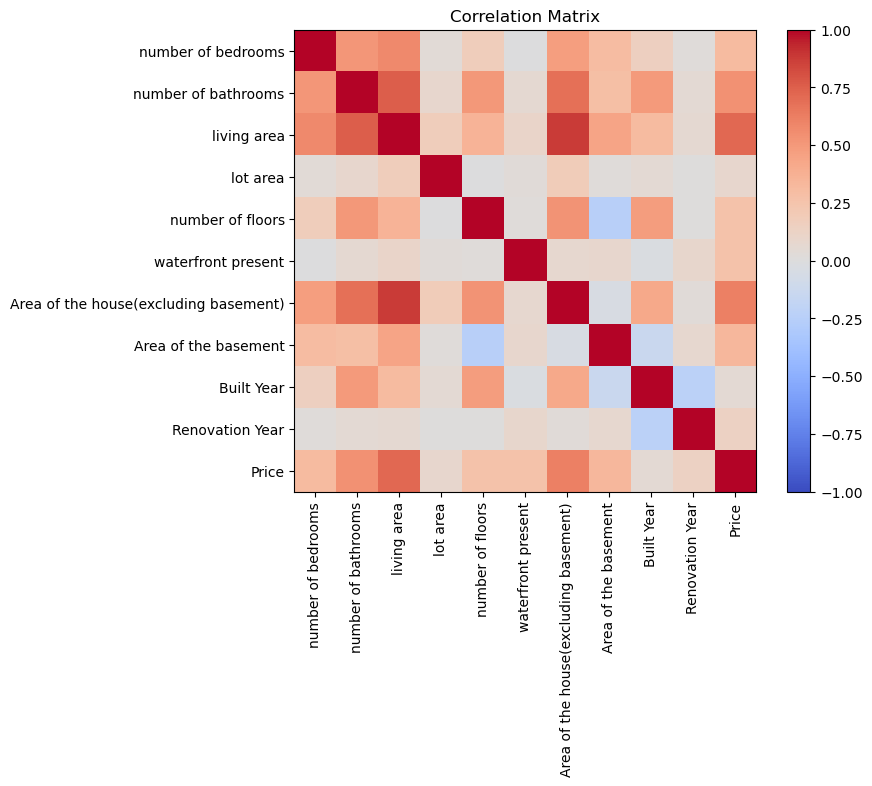

In [17]:
correlation_matrix = df.corr()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap using the correlation matrix
heatmap = ax.imshow(correlation_matrix, cmap='coolwarm',vmin=-1,vmax=1)

# Set the x-axis and y-axis labels
ax.set_xticks(range(len(correlation_matrix.columns)))
ax.set_yticks(range(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=90)
ax.set_yticklabels(correlation_matrix.columns)

# Add a colorbar legend
cbar = plt.colorbar(heatmap)

# Set the title
ax.set_title('Correlation Matrix')

# Display the plot
plt.show()


In [18]:
df.columns

Index(['number of bedrooms', 'number of bathrooms', 'living area', 'lot area',
       'number of floors', 'waterfront present',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Price'],
      dtype='object')

In [19]:
df['number of bedrooms'].unique()

array([ 5,  4,  3,  2,  7,  6,  9,  1,  8, 33, 10, 11], dtype=int64)

In [20]:
def uniquevalue(df):
    for column in df.columns:
                uni=df[column].unique()
                if len(uni)<50:
                    print(column,   uni,  len(uni))
        

In [21]:
uniquevalue(df)

number of bedrooms [ 5  4  3  2  7  6  9  1  8 33 10 11] 12
number of bathrooms [2.5  2.75 2.   3.25 1.75 2.25 1.   1.5  3.   8.   3.5  4.25 4.   5.
 3.75 4.5  5.75 1.25 6.5  4.75 0.75 5.25 5.5  6.25 6.75 7.5  0.5  6.
 7.75] 29
number of floors [2.  1.5 1.  2.5 3.  3.5] 6
waterfront present [0 1] 2


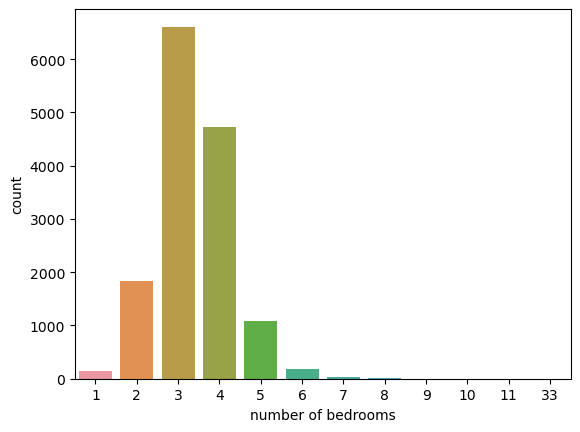

In [22]:
sns.countplot(data=df,x='number of bedrooms')
plt.ylabel('count')
plt.xlabel('number of bedrooms')
plt.show()

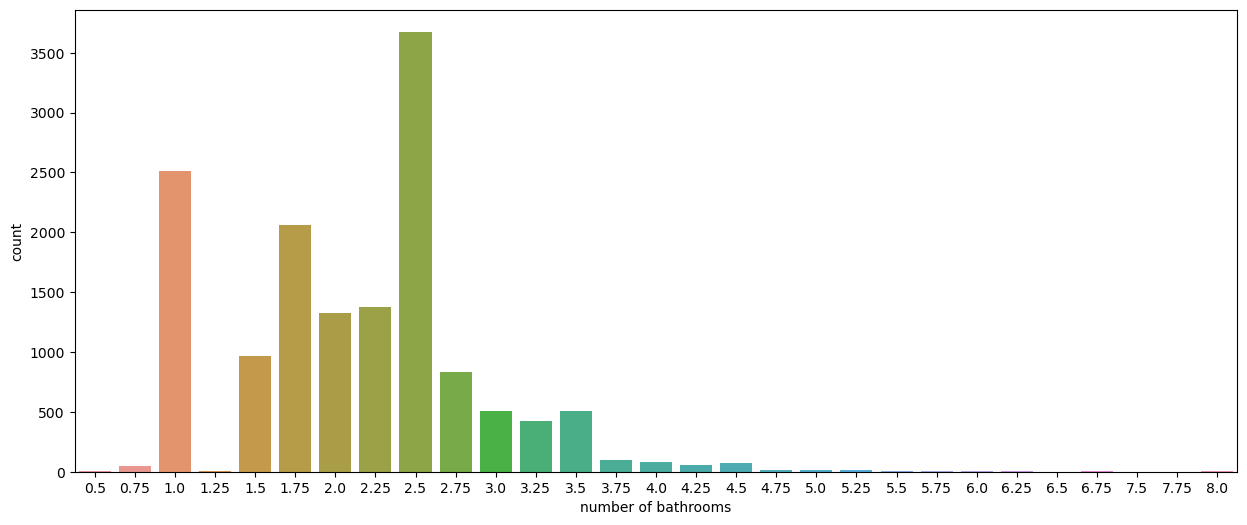

In [23]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='number of bathrooms')
plt.ylabel('count')
plt.xlabel('number of bathrooms')
plt.show()

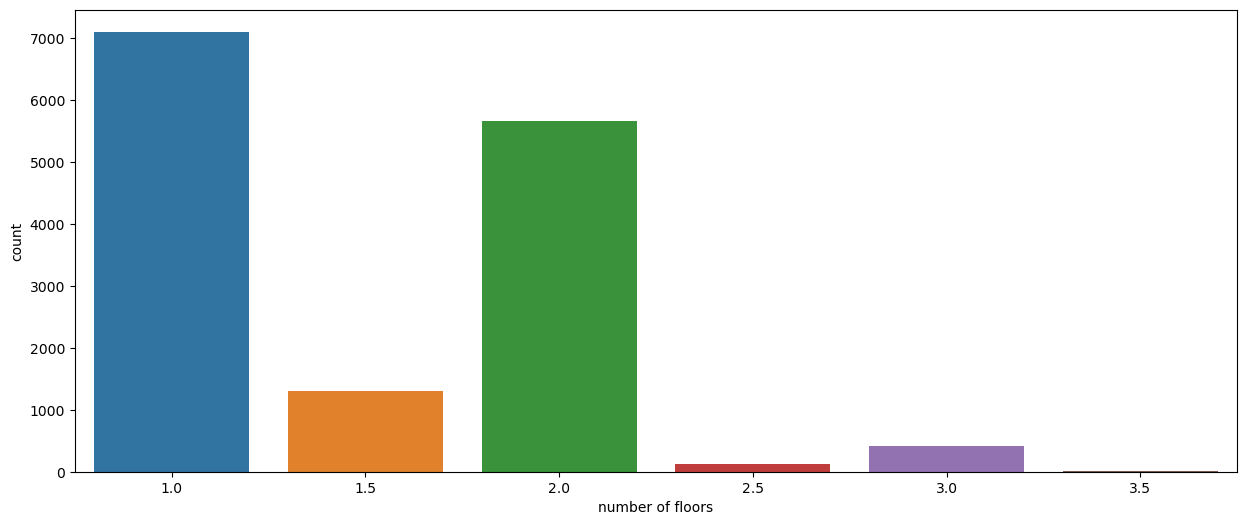

In [24]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='number of floors')
plt.ylabel('count')
plt.xlabel('number of floors')
plt.show()

Text(0.5, 0, 'number of bedroom')

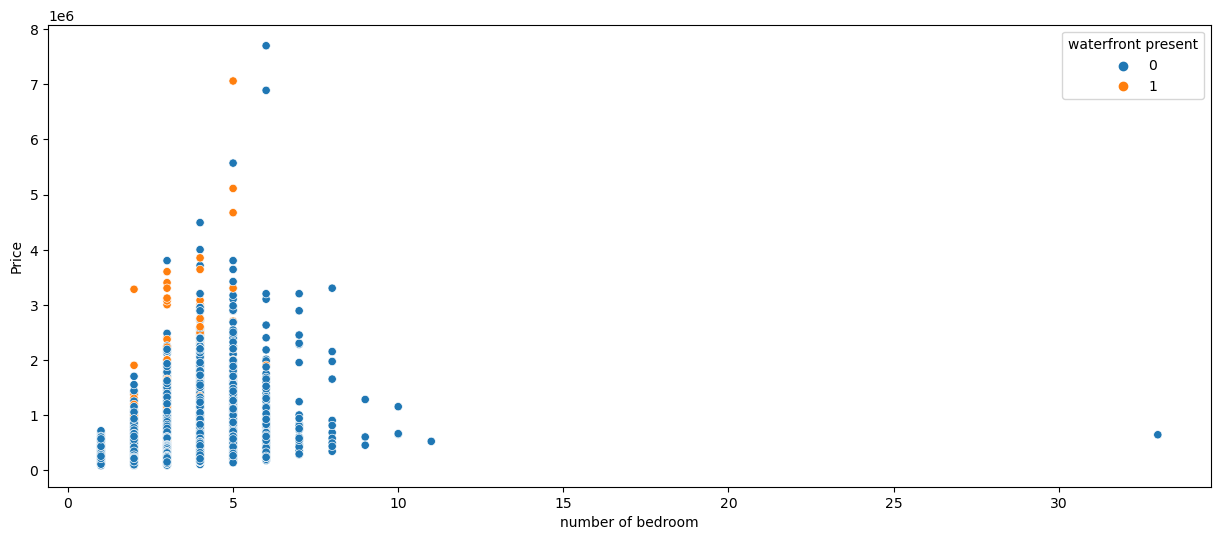

In [25]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='number of bedrooms',y='Price',data=df,hue='waterfront present')
plt.ylabel('Price')
plt.xlabel('number of bedroom')

In [26]:
df.columns

Index(['number of bedrooms', 'number of bathrooms', 'living area', 'lot area',
       'number of floors', 'waterfront present',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Price'],
      dtype='object')

In [27]:
# Spliting the data into training and testing dataset


X=df[['number of bedrooms', 'number of bathrooms', 'living area', 'lot area',
       'number of floors', 'waterfront present',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year']]
y=df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [28]:
X_train.shape

(10962, 10)

In [29]:
X_test.shape

(3654, 10)

In [30]:
# Linear regression model will be used for prediction

from sklearn.linear_model import LinearRegression

In [31]:
li=LinearRegression()

In [32]:
li.fit(X_train,y_train)

LinearRegression()

In [33]:
prediction=li.predict(X_test)

In [34]:
mean_absolute_error(y_test,prediction)

156334.83046573994

In [35]:
prediction.dtype

dtype('float64')

In [36]:
y_test.dtype

dtype('int64')

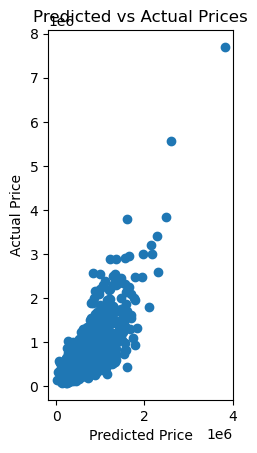

In [37]:
# Create a scatter plot
plt.scatter(prediction, y_test)

# Set labels and title
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Predicted vs Actual Prices')
plt.gca().set_aspect('equal')
# Display the plot
plt.show()

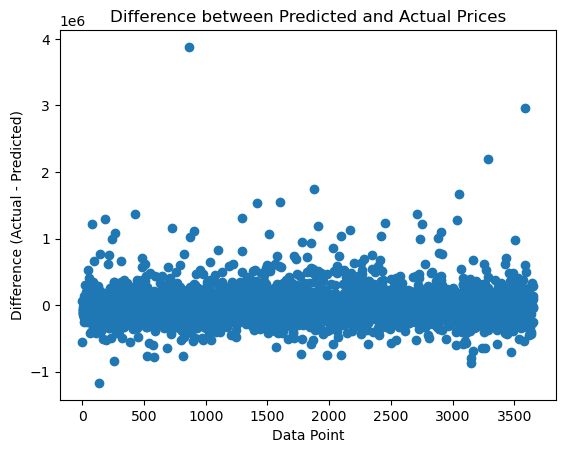

In [38]:
difference = y_test - prediction

# Create a scatter plot of the difference
plt.scatter(range(len(difference)), difference)

# Set labels and title
plt.xlabel('Data Point')
plt.ylabel('Difference (Actual - Predicted)')
plt.title('Difference between Predicted and Actual Prices')

# Display the plot
plt.show()
